In [9]:
import numpy as np
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.spatial import distance

poly = Polygon([(0,-3),(-6,0),(-6,4),(0,7),(4,5),(9,0),(4,-4)])

minx, miny, maxx, maxy = poly.bounds 

pontos =[]
# lista_x = []
# lista_y = []
# lista_candidatos_x = []
# lista_candidatos_y = []
cont= 100
i=0
while i < cont:
    check=True
    while check:
        x = None
        y = None
        x = random.uniform(minx,maxx)
        y = random.uniform(miny,maxy)
        coords = np.array([(x,y)])
#       print(coords)
        points = Point(coords[0])#[Point(xy) for xy in coords]
#         print(points.within(poly))
        """
        verificar se esta dentro do poligono
        """
        check = False if points.within(poly) else True
    pontos.append([x,y])
    """
    Verifico se o ultimo ponto criado respeita a dist. euclidiana
    """
    if len(pontos)>1:
        ult_pont = pontos[-1]
        flag = True
        for i in range(len(pontos)-1):
            
            flag = flag and (distance.euclidean(pontos[i],ult_pont)>0.8) and (ult_pont != pontos[i])
            if not flag: break
        if flag == True:
            i=i+1
        else:
            pontos.remove(ult_pont)
    else:
        i=i+1
"""
Matriz referente as distâncias euclidianas
"""
mat =np.zeros((len(pontos),len(pontos)))

for l in range(len(pontos)):
    for c in range(len(pontos)):
        if l<c:
            mat[l,c] = distance.euclidean(pontos[l],pontos[c])
            mat[c,l] = mat[l,c]

        
print(pontos)
# print("\n")
# print(mat<0.8)
# print(pontos[-1])

[[-2.1947535054804637, 4.069685827977354], [-1.3190474895303073, -0.7150121983060727], [3.50553151049907, -2.86573977418776], [-3.3570785023937884, 1.3288609297523886], [-0.9179948454196207, 0.7440020121101902], [-0.2966389648440053, 6.492982175433086], [-4.461215857232132, 4.349759894046002], [-2.7041368518276503, -1.3904120923571663], [6.332937888709051, 0.17528018921034594], [4.282662497712449, 2.6883381089131415], [0.672389256812103, 2.2197225385085027], [-2.4933442670901904, 2.295572432175291], [1.1740261755521164, -1.5115071296837295], [1.8749514825921922, -2.3529852441479506], [1.5175976085030651, 5.46555697422013], [4.692694521571678, -1.2893059622618104], [-2.9291300536768747, 4.876597051675908], [3.3300116079322297, 3.817706317183183], [2.7410533732132905, -0.20421544311923912], [-2.13738165920606, -0.09307015037444], [-0.2704670370872151, -1.780164382127725], [2.431440378741936, -3.108003689712391], [-4.8865035958613685, 2.1363814070413474], [-0.014509780876946543, 4.9891367

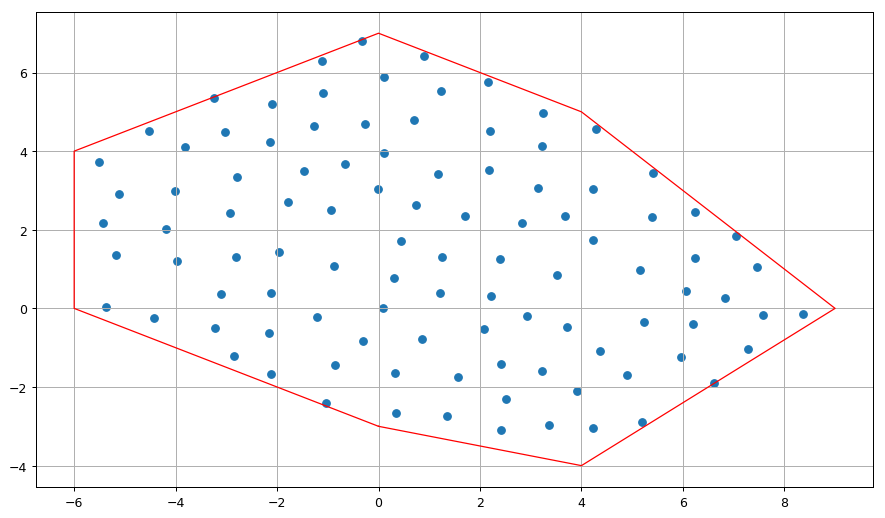

In [8]:
pontos = np.array(pontos)

x,y = poly.exterior.xy

fig = plt.figure(1, figsize=(12,7), dpi=90)
plt.scatter(pontos[:,0],pontos[:,1])
plt.plot(x, y, color='red',linewidth=1)
plt.grid(True)

